# Magistère 2A INTRODUCTION AU MACHINE LEARNING
## TP 2: Classification - Premiers pas

## Objectifs du TP
Il s'agit ici de développer des classifieurs simples. Dans un premier
temps, nous allons nous intéressé au modèle simple de classification
bayésienne. Dans une deuxième phase, nous allons développer l'algorithme
dit des *$k$ plus proches voisins* et nous l'appliquerons à la base de
données `IRIS`. Pour manipuler les données de cette base, nous
utiliserons le package `PANDAS` vu lors du TP précédent

## IRIS

* Charger dans une `DataFrame` la base de données `IRIS` à partir du fichier `IRIS.csv`.Les colonnes de la DataFrame seront nommées `’sl’,’sw’,’pl’,’pw’,’class’`.

In [ ]:
import os
import pandas as pds
import numpy as np

In [1]:
iris = pds.read_csv((os.path.join("data", "iris.csv")))
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


* Remplacer les valeurs de classes `’Iris-setosa’,’Iris-versicolor’,’Iris-virginica` par des valeurs numériques

In [2]:
varieties = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
iris.variety = iris.variety.map(varieties) 
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


* Utiliser la fonction split pour mélanger et scinder la DataFrame en deux DataFrames dont l'une contiendra 80% des échantillons et l'autre 20%. La premiere constituera la base d'apprentissage et la seconde la base de validation (test).

In [45]:
index_split = np.split(iris.index, [int(0.8*iris.shape[0])])
train = iris.iloc[index_split[0]]
test = iris.iloc[index_split[1]]

## Classification par la méthode bayésienne
* Calculer la fréquence de chaque classe

In [4]:
variety_freq = np.array([])

for i in range(3):
    variety_freq = np.append(variety_freq, iris[iris.variety==i].shape[0]/iris.shape[0])

variety_freq

array([0.33333333, 0.33333333, 0.33333333])

* Étant données une classe et une variable, calculer la moyenne et la variance de la variable

In [5]:
variety_setosa = iris[iris.variety==0].loc[:,['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
variety_versicolor = iris[iris.variety==1].loc[:,['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
variety_virginica = iris[iris.variety==2].loc[:,['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

exemple avec la variete Setosa :

In [6]:
variety_setosa.mean(axis=0)

sepal.length    5.006
sepal.width     3.428
petal.length    1.462
petal.width     0.246
dtype: float64

In [7]:
variety_setosa.var(axis=0)

sepal.length    0.124249
sepal.width     0.143690
petal.length    0.030159
petal.width     0.011106
dtype: float64

* Étant une variable et une valeur de cette variable, calculer en utilisant la règle de bayes la probabilité d'appartenir à chaque classe. Renvoyer la classe la plus probable.

In [8]:
def Bayes_decision(variable, valeur, variety_freq):
    
    """
       On compare les proba que notre iris mystere appartienne a chacune des classes d'iris.
       On garde la classe pour laquelle la proba est la plus grande.
       On cherche l argument max de la P( attribut de la classe = k sachant la valeur de la variable )
       
       Bayesien naif : on considere que les descripteurs sont independants entre eux et on utilise des log
       en pratique pour des calculs plus precis avec des valeurs < 1.
       
       argmax de : 
       ln P(attribut de la classe = k) + ln P(variable = valeur sachant attribut de la classe = k)
       = 
       ln (classe = k) + ln (variable = valeur & classe = k / classe = k ]
    """
    
    probamax = np.array([])
    for k in range(3):

        formule = np.log( variety_freq[k] ) + np.log( sum(iris[iris.variety==k][variable]==valeur) / (iris[iris.variety==k]).shape[0] )
        probamax = np.append(probamax, formule)
    
    return np.argmax(probamax)

classe_predite = Bayes_decision('sepal.length', 5, variety_freq)

liste_classes = ['Setosa', 'Versicolor', 'Virginica']
print(liste_classes[classe_predite])

Setosa


C:\Users\KU\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


* En utilisant la fonction de décision créée précédemment, créer maintenant une fonction qui calculera l'erreur de prédiction sur la base de test (le deuxième DataFrame) en fonction de la variable choisie.

In [9]:
def erreur_Bayes_prediciton(test_base, variable, variety_freq):
    
    cpt=0
    for i in range(test_base.shape[0]):
        
        if Bayes_decision(variable, test_base[variable].iloc[i], variety_freq) != test_base.variety.iloc[i] :
            cpt+=1
            
    return cpt/test_base.shape[0]

erreur_Bayes_prediciton(test, 'sepal.length', variety_freq)

C:\Users\KU\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


0.26666666666666666

* Trouver la variable la plus efficace pour classer avec cette méthode

In [10]:
erreur = np.array([])
L = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

for variable in L:
    erreur = np.append(erreur, erreur_Bayes_prediciton(test, variable, variety_freq))

print(erreur, '\nMeilleure variable pour cette methode : ', L[np.argmin(erreur)])

C:\Users\KU\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


[0.26666667 0.46666667 0.06666667 0.1       ] 
Meilleure variable pour cette methode :  petal.length


## Classification par la méthode des $k$ plus proches voisins

* Créer une fonction qui, à partir d'un point $P$ donné, calcule la liste des distances Euclidiennes de $P$ à tous les autres points de la base d'apprentissage.

In [11]:
from scipy import spatial

def dist_eu(p, train_base):
    base = train_base.drop('variety', axis=1)
    point = pds.DataFrame(np.full((base.shape[0],4), p))
    points = base
    distance = np.array([])
    for i in range(base.shape[0]):
        distance = np.append(distance, spatial.distance.euclidean(point.iloc[i], points.iloc[i]))
    pds.set_option('display.max_rows', None)
    return pds.DataFrame(distance, columns=['distance'])

dist_eu([6, 3.4, 1.5, 0.3], train)

,distance
0,0.916515
1,1.178983
2,1.334166
3,1.435270
4,1.029563
5,0.812404
6,1.403567
7,1.004988
8,1.682260
9,1.157584


* Créer une fonction qui à partir d'un point $P$ donné et un entier $k$ renverra les $k$ plus proches voisins de $P$ au sens de la distance Euclidienne calculée précédemment.

In [12]:
def k_proches_voisins(p, k, train_base):
    
    distance = dist_eu(p, train_base)
    
    return distance.nsmallest(k,'distance').index

k_proches_voisins([6, 3.4, 1.5, 0.3], 3, train)

Int64Index([18, 36, 31], dtype='int64')

* Créer ensuite une fonction de décision qui, à partir d'un point $P$ donné et du nombre de voisins $k$, renverra la classe majoritaire parmi les $k$ voisins de $P$ considérée comme la classe de $P$.

In [13]:
from collections import Counter

def voisin_decision(p, k, train_base):
    
    classe = np.array([])
    for element in k_proches_voisins(p, k, train_base):
        classe = np.append(classe, train_base.variety.loc[element])

    count = Counter(classe)
    
    return int(count.most_common(1)[0][0])
    
classe_predicte = voisin_decision([6, 3.4, 1.5, 0.3], 3, train)
liste_classes = ['Setosa', 'Versicolor', 'Virginica']
print(liste_classes[classe_predite])

Setosa


* En utilisant la fonction de décision créée précédemment, créer maintenant une fonction qui calculera l'erreur de prédiction sur la base de test (le deuxième DataFrame).

In [14]:
def erreur_voisin_prediction(test_base, train_base, k):
    
    cpt=0
    
    for i in range(test_base.shape[0]):
        p = np.array(test_base[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].iloc[i])
        if voisin_decision(p, k, train_base) != test_base.variety.iloc[i] :
            cpt+=1
            
    return cpt/test_base.shape[0]

erreur_voisin_prediction(test, train, 3)

0.23333333333333334

* Etudier l'évolution de l'erreur de prédiction sur la base de test en fonction du choix de $k$.

Text(0.5, 1.0, "evolution de l'erreur en fonction du nombre de voisins")

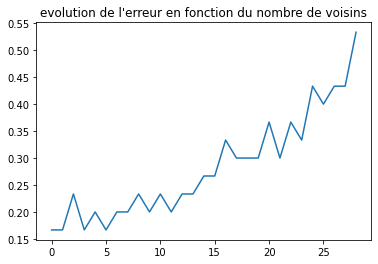

In [15]:
from tqdm.auto import tqdm

k_error = np.array([])

for k in tqdm(range(1,test.shape[0])):
    k_error = np.append(k_error, erreur_voisin_prediction(test, train, k))
    
from matplotlib import pyplot as plt
plt.plot(k_error)
plt.title("evolution de l'erreur en fonction du nombre de voisins")

* Etudier l'évolution de l'erreur de prédiction sur la base de test en fonction du nombre de points utilisés pour l'apprentissage et pour le test.

(1, 5)
(11, 5)
(21, 5)
(31, 5)
(41, 5)
(51, 5)
(61, 5)
(71, 5)
(81, 5)
(91, 5)
(101, 5)
(111, 5)
(121, 5)
(131, 5)
(141, 5)



Text(0.5, 1.0, "evolution de l'erreur en fonction du nombre de points utilises pour le test")

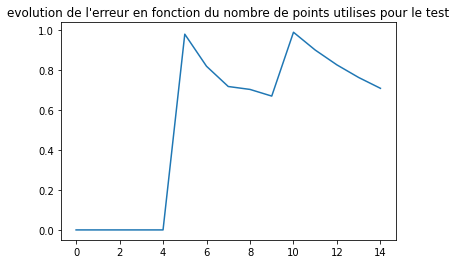

In [20]:
base_error = np.array([])
test_pts = 1

for i in tqdm( range(0, iris.shape[0]-1, 10) ):

    index_split = np.split( iris.index, [int( test_pts )] )
    train = iris.iloc[index_split[1]]
    test = iris.iloc[index_split[0]]
    print(test.shape)
    base_error = np.append(base_error, erreur_voisin_prediction(test, train, 3))

    test_pts += 10
    
plt.plot(base_error)
plt.title("evolution de l'erreur en fonction du nombre de points utilises pour le test")

* Créer des variantes de cet algorithme en remplaçant la distance Euclidienne par d'autres choix de distances.


Text(0.5, 1.0, "evolution de l'erreur en fonction du nombre de points utilises pour le test")

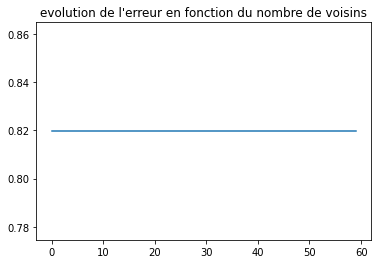

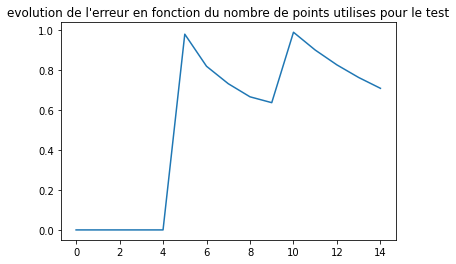

In [88]:
from scipy.spatial.distance import cosine, squareform

def k_proches_voisins2(p, k, train_base):
    
    #distance = pds.DataFrame(columns=['distance'])
    train_base = train_base.drop('variety', axis=1)
    distance = train_base.apply(lambda row : cosine(p,row), axis=1)
    distance = pds.DataFrame(distance, columns=['distance'])

    return distance.nsmallest(k, 'distance').index

def voisin_decision2(p, k, train_base):
    
    classe = np.array([])
    for element in k_proches_voisins2(p, k, train_base):
        classe = np.append(classe, train_base.variety.loc[element])

    count = Counter(classe)
    
    return int(count.most_common(1)[0][0])

    
def erreur_voisin_prediction2(test_base, train_base, k):
    
    cpt=0
    for i in range(test_base.shape[0]):
        p = np.array(test_base[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].iloc[i])
        if voisin_decision2(p, k, train_base) != test_base.variety.iloc[i] :
            cpt+=1
            
    return cpt/test_base.shape[0]

k_error2 = np.array([])

for k in tqdm( range(1,test.shape[0]) ):
    k_error2 = np.append(k_error2, erreur_voisin_prediction2(test, train, k))
    
plt.figure()
plt.plot(k_error2)
plt.title("evolution de l'erreur en fonction du nombre de voisins")

base_error2 = np.array([])
test_pts = 1

for i in tqdm( range(0, iris.shape[0]-1, 10) ):

    index_split = np.split( iris.index, [int( test_pts )] )
    train = iris.iloc[index_split[1]]
    test = iris.iloc[index_split[0]]
    base_error2 = np.append(base_error2, erreur_voisin_prediction2(test, train, 3))
    test_pts += 10
        
plt.figure()
plt.plot(base_error2)
plt.title("evolution de l'erreur en fonction du nombre de points utilises pour le test")